# Stock Prices Prediction Using Machine Learning


Financial markets have a vital role in the development of modern society. They allow the deployment of economic resources. Changes in stock prices reflect changes in the market. In this study, we focus on predicting stock prices by deep learning model.

## Importing packages
* #### Keras 
Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.
In our project we will used on top of TensorFlow.

* #### Scikit-learn 
Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms.

* #### Pandas 
Pandas is a popular Python package for data science, and with good reason: it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy, among many other things. The DataFrame is one of these structures.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import keras
from keras.layers import Dense, Dropout, LSTM

## Importing data
We import an historical data of the stock price of Google from finance.yahoo.com

In [132]:
df = pd.read_csv('GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-26,1205.189941,1207.650024,1181.760010,1189.839966,1189.839966,1537600
1,2019-03-27,1191.920044,1191.920044,1164.229980,1178.010010,1178.010010,1471400
2,2019-03-28,1175.500000,1177.250000,1163.430054,1172.270020,1172.270020,1120100
3,2019-03-29,1180.180054,1183.969971,1166.380005,1176.890015,1176.890015,1544500
4,2019-04-01,1187.540039,1200.199951,1186.359985,1198.979980,1198.979980,1385300


* Meaning of open-high-low-close  :
    * Open Price : The Stock at which opens at the start of market
    * High price : The particular stock which made high during that particular day
    * Low Price : The Particular stock which made Low during that particular day
    * Close Price : The stock closing at the end of the Market hours

## Ploting the data

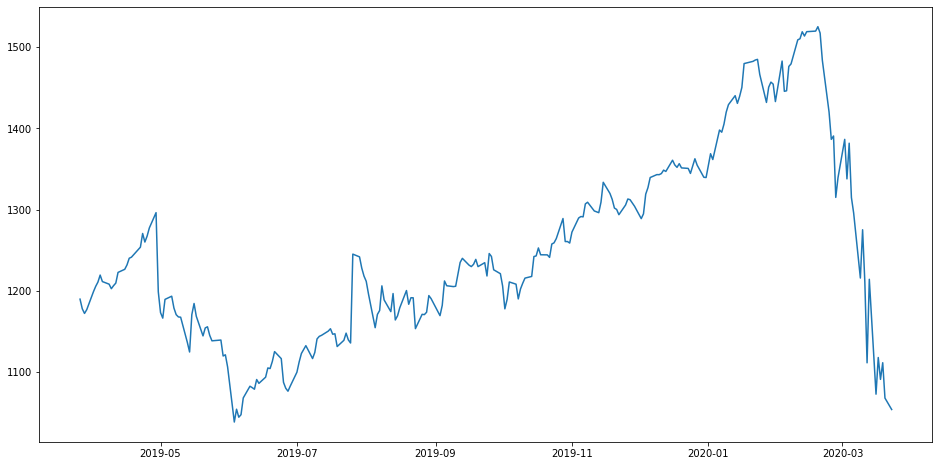

In [133]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price')

## Split training and test sets

* 75% for training
* 25% for test

In [134]:
seriesdata = todataframe.sort_index(ascending=True, axis=0)
new_seriesdata = pd.DataFrame(index=range(0,len(todataframe)),columns=['Date','Close'])
length_of_data=len(seriesdata)
for i in range(0,length_of_data):
    new_seriesdata['Date'][i] = seriesdata['Date'][i]
    new_seriesdata['Close'][i] = seriesdata['Close'][i]

new_seriesdata.index = new_seriesdata.Date
new_seriesdata.drop('Date', axis=1, inplace=True)

myseriesdataset = new_seriesdata.values
totrain = myseriesdataset[0:int(len(seriesdata)*0.75),:]
totest = myseriesdataset[int(len(seriesdata)*0.75):,:]

scalerdata = MinMaxScaler(feature_range=(0, 1))
scale_data = scalerdata.fit_transform(myseriesdataset)
x_totrain, y_totrain = [], []
length_of_totrain=len(totrain)
for i in range(60,length_of_totrain):
    x_totrain.append(scale_data[i-60:i,0])
    y_totrain.append(scale_data[i,0])
x_totrain, y_totrain = np.array(x_totrain), np.array(y_totrain)
x_totrain = np.reshape(x_totrain, (x_totrain.shape[0],x_totrain.shape[1],1))

## LSTM
LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.

### How it works

LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![alt text](lstm-diagram.png "LSTM")

There are three types of gates within a unit:

* Input Gate: Scales input to cell (write)
* Output Gate: Scales output to cell (read)
* Forget Gate: Scales old cell value (reset)
* Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

In [157]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_totrain.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adadelta')
lstm_model.fit(x_totrain, y_totrain, epochs=3, batch_size=1, verbose=2)

Epoch 1/3
 - 6s - loss: 0.0074
Epoch 2/3
 - 5s - loss: 0.0041
Epoch 3/3
 - 5s - loss: 0.0041


## Predicting stock price

In [158]:
inputs = new_seriesdata[len(new_seriesdata) - (len(totest)) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scalerdata.transform(inputs)
tostore_test_result = []
for i in range(60,inputs.shape[0]):
    tostore_test_result.append(inputs[i-60:i,0])
tostore_test_result = np.array(tostore_test_result)
tostore_test_result = np.reshape(tostore_test_result,(tostore_test_result.shape[0],tostore_test_result.shape[1],1))
myclosing_priceresult = lstm_model.predict(tostore_test_result)
myclosing_priceresult = scalerdata.inverse_transform(myclosing_priceresult)

#### Predicted result

In [161]:
myclosing_priceresult

array([[1324.3269],
       [1326.29  ],
       [1327.8483],
       [1328.8257],
       [1330.1183],
       [1331.2213],
       [1331.5594],
       [1331.393 ],
       [1332.0919],
       [1332.9993],
       [1335.457 ],
       [1338.634 ],
       [1342.5059],
       [1347.1946],
       [1352.5103],
       [1358.379 ],
       [1363.9153],
       [1369.3086],
       [1374.7568],
       [1381.0973],
       [1387.7506],
       [1394.3246],
       [1400.5417],
       [1405.5087],
       [1408.1437],
       [1409.9393],
       [1411.3328],
       [1412.3158],
       [1412.1761],
       [1413.2788],
       [1413.6202],
       [1413.5483],
       [1414.3578],
       [1415.7665],
       [1418.611 ],
       [1422.2217],
       [1426.4521],
       [1430.6392],
       [1434.7909],
       [1438.7238],
       [1442.5225],
       [1445.7428],
       [1447.2017],
       [1445.1399],
       [1439.759 ],
       [1432.722 ],
       [1422.0505],
       [1410.6089],
       [1401.0427],
       [1391.1838],
